   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


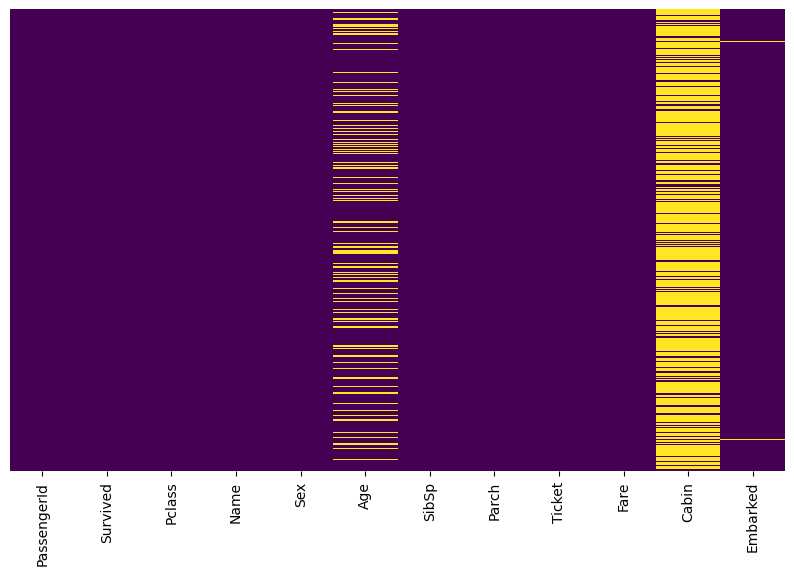

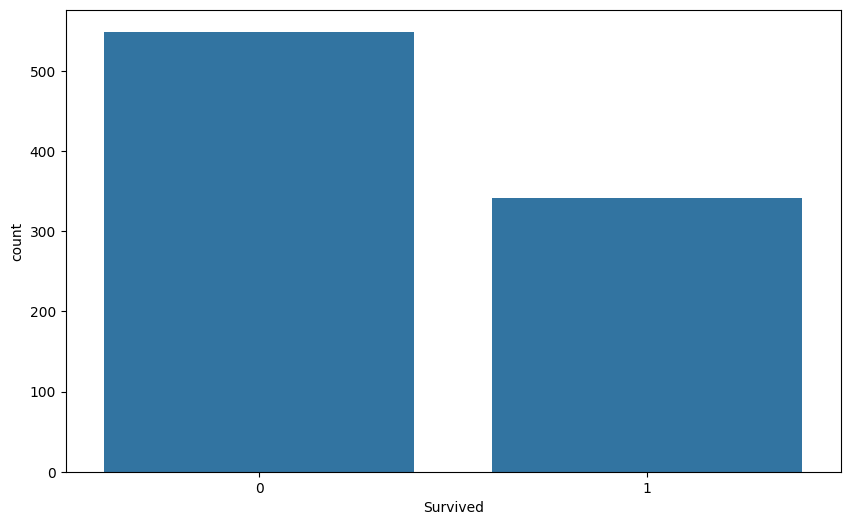

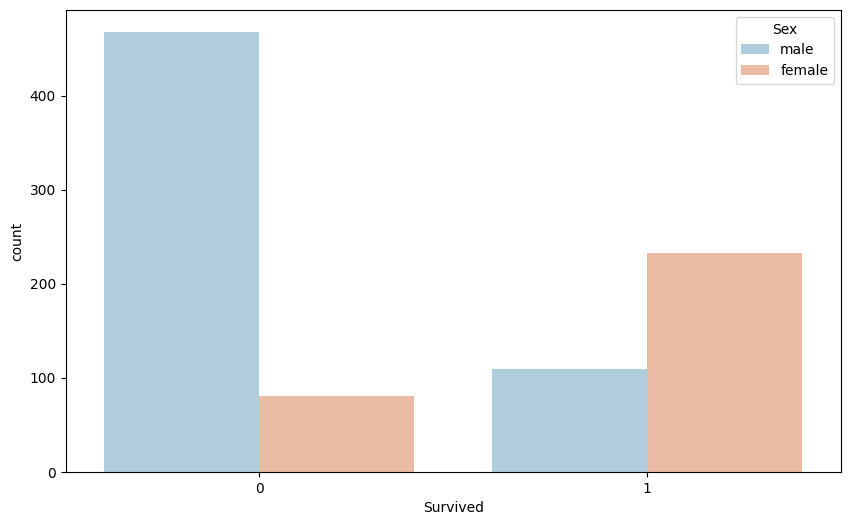

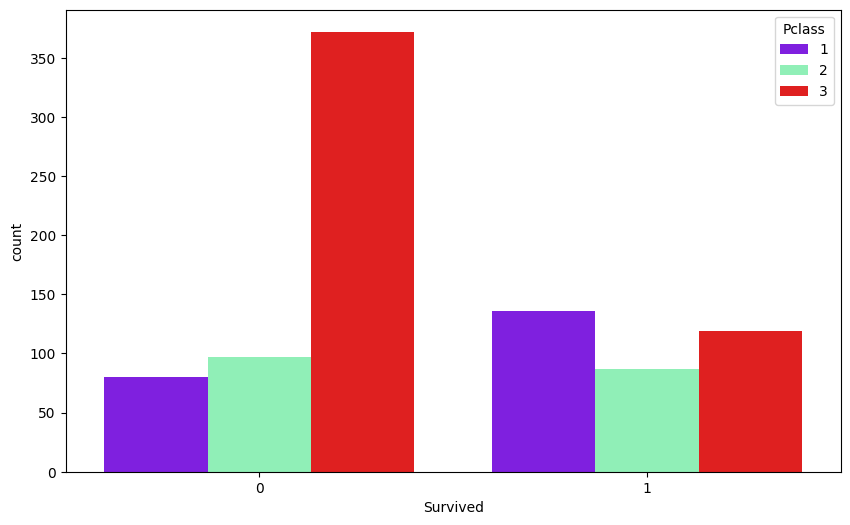

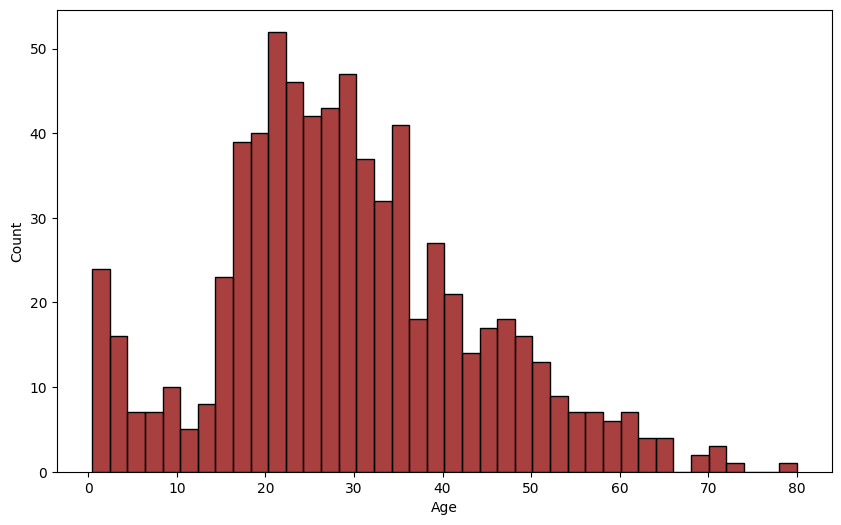

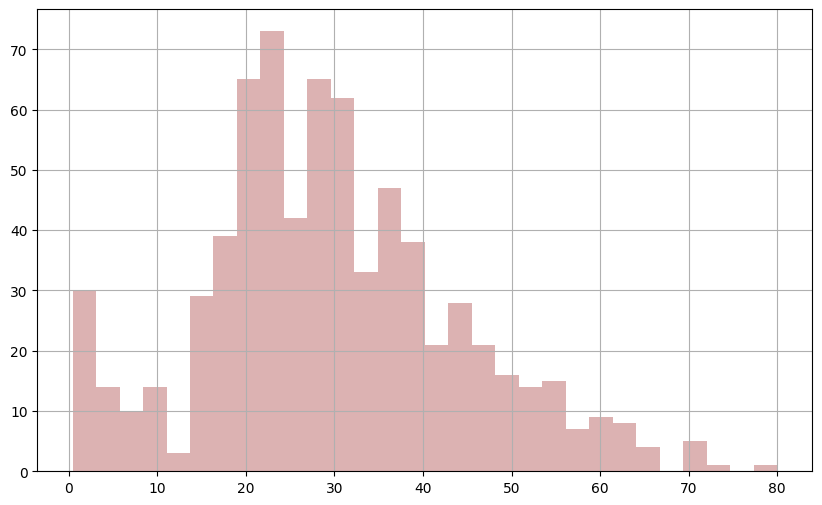

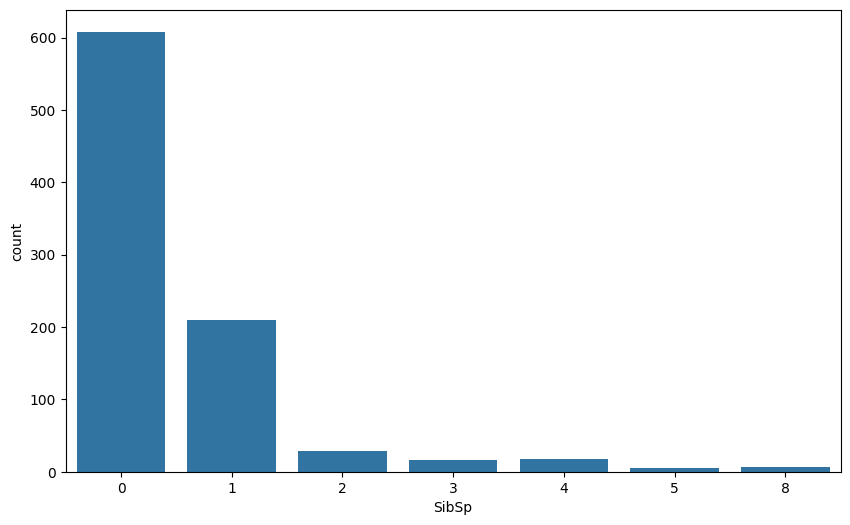

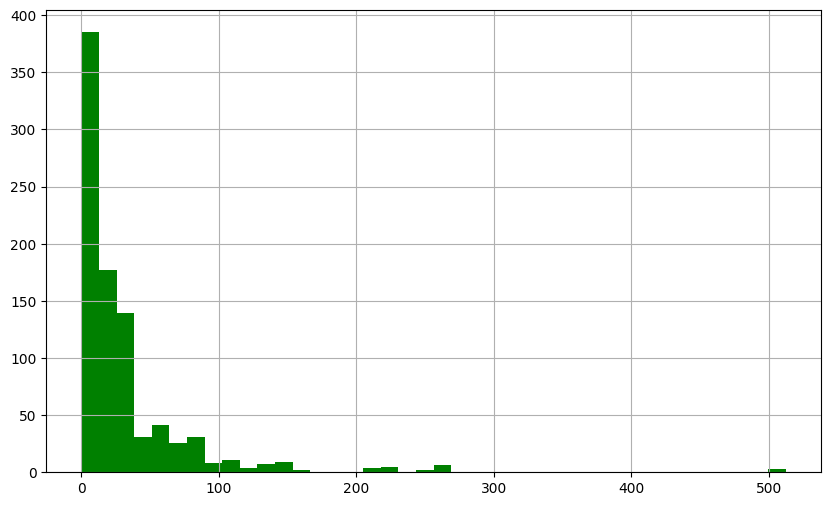

<ipython-input-1-2da3b9920c6f>:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




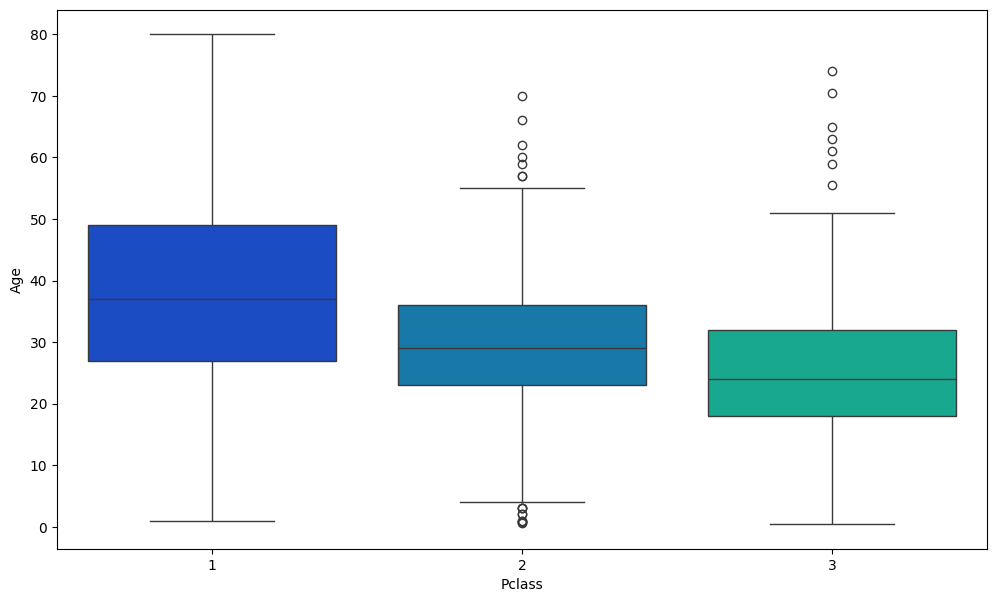

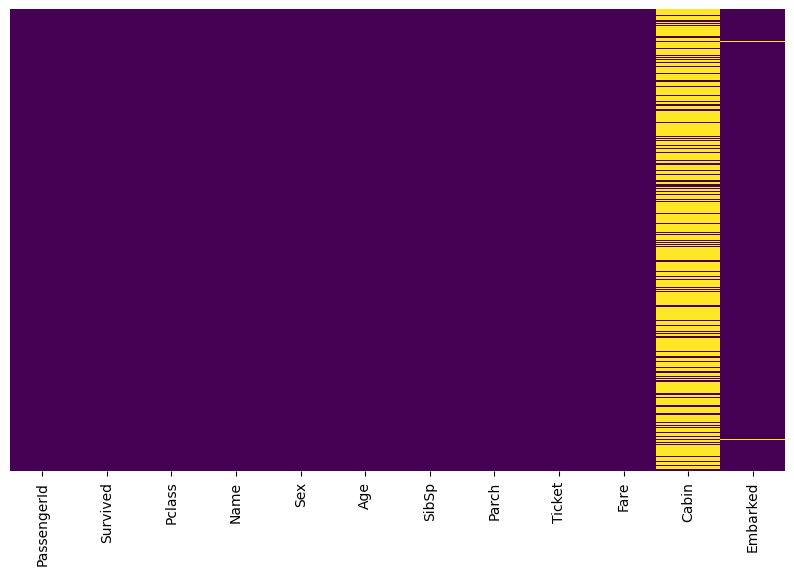

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB
None
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare   male      Q  \
0            1         0       3  22.0      1      0   7.2500   True  False   
1            2         1       1  38.0      1      0  71.2833  False  False   
2            3         1       3  26.0      0    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

# Read the dataset
data = pd.read_csv('titanic_train.csv')

# Show first few records
print(data.head())

# Plot missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

# Count plot for 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Survived')
plt.show()

# Count plot for 'Survived' with 'Sex' hue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Survived', hue='Sex', palette='RdBu_r')
plt.show()

# Count plot for 'Survived' with 'Pclass' hue
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Survived', hue='Pclass', palette='rainbow')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=40, kde=False, color='darkred')
plt.show()

# Histogram for Age
plt.figure(figsize=(10, 6))
data['Age'].hist(bins=30, color='darkred', alpha=0.3)
plt.show()

# Count plot for 'SibSp'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SibSp')
plt.show()

# Fare distribution
plt.figure(figsize=(10, 6))
data['Fare'].hist(color='green', bins=40)
plt.show()

# Initialize cufflinks
cf.go_offline()

# Interactive plot for Fare
data['Fare'].iplot(kind='hist', bins=30, color='green')

# Boxplot for Age by Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='Pclass', y='Age', palette='winter')
plt.show()

# Function to fill missing Age values based on Pclass
def fill_age(cols):
    age, pclass = cols
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    return age

# Apply the fill_age function
data['Age'] = data[['Age', 'Pclass']].apply(fill_age, axis=1)

# Plot missing data heatmap after filling Age
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

# Drop 'Cabin' column and rows with any remaining missing values
data.drop(columns=['Cabin'], inplace=True)
data.dropna(inplace=True)

# Show dataset info
print(data.info())

# Convert categorical variables to dummy variables
sex_dummies = pd.get_dummies(data['Sex'], drop_first=True)
embarked_dummies = pd.get_dummies(data['Embarked'], drop_first=True)

# Drop original categorical columns
data.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True)

# Concatenate dummy variables with the dataset
data = pd.concat([data, sex_dummies, embarked_dummies], axis=1)

# Display the modified dataset
print(data.head())

# Define features and target variable
features = data.drop(columns=['Survived'])
target = data['Survived']

# Display the features
print(features.head())
